Problema binário: Spruce/Fir (1) vs Outras (0)
Features usadas: ['Elevation', 'Horizontal_Distance_To_Roadways'] 

Tamanhos -> treino: 406708 | teste: 174304

Treinando o modelo de Regressão Logística...
Treinamento concluído.

=== Desempenho no TESTE (com 2 features) ===
Acurácia : 0.735
Precisão : 0.658
Recall   : 0.568
F1       : 0.61

Matriz de Confusão (linhas=Real, colunas=Previsto):
           Prev 0   Prev 1
Real 0  |   91974    18778   <- Outras
Real 1  |   27435    36117   <- Spruce/Fir



c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


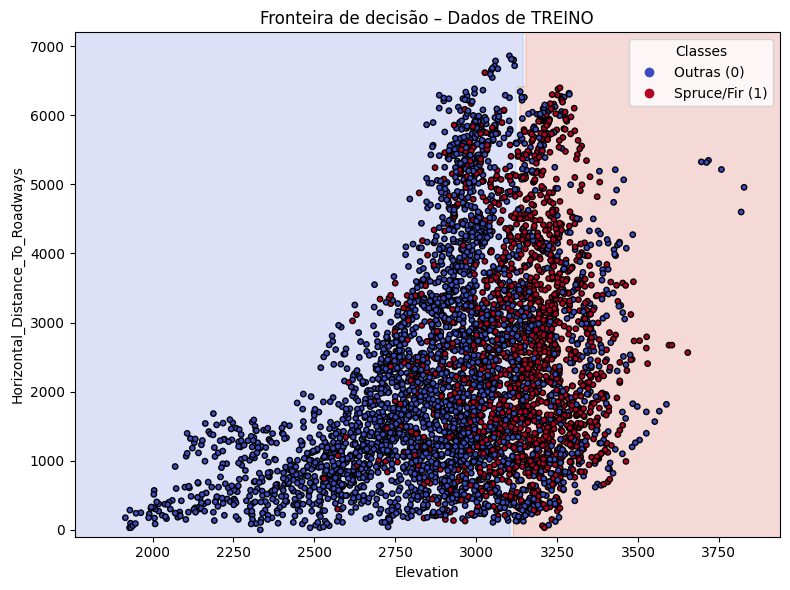

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


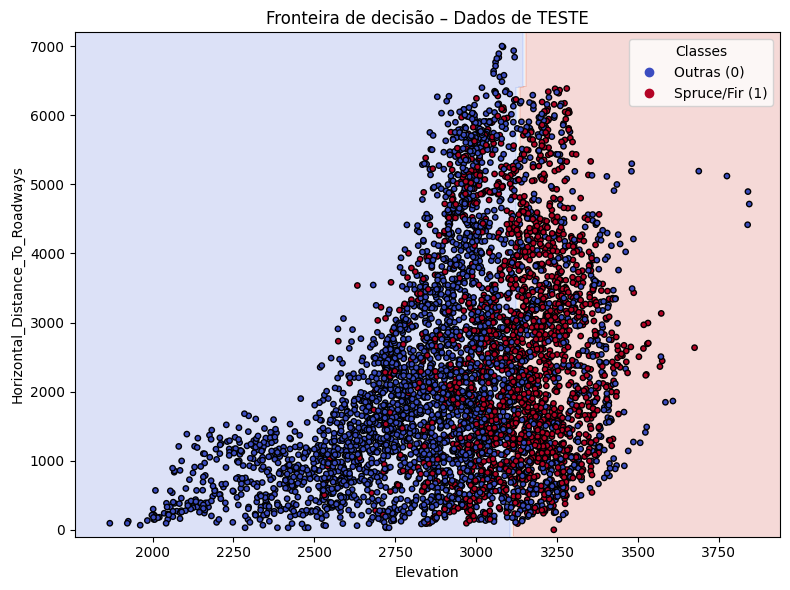

=== Predições Individuais ===
Entrada [np.int64(2800), np.int64(1000)] -> prev=Outras (0) | P(Outras)= 0.840 | P(Spruce/Fir)= 0.160
Entrada [np.int64(3200), np.int64(500)] -> prev=Spruce/Fir (1) | P(Outras)= 0.378 | P(Spruce/Fir)= 0.622
Entrada [np.int64(3000), np.int64(2000)] -> prev=Outras (0) | P(Outras)= 0.649 | P(Spruce/Fir)= 0.351


c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# =============================================================== 
# Covertype binário (Spruce/Fir=1 vs Outras=0) com 2 features
# Modelo: Regressão Logística
# Saídas:
#   - métricas e matriz de confusão no teste
#   - figura 1: fronteira de decisão + pontos de TREINO
#   - figura 2: fronteira de decisão + pontos de TESTE
# ===============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 1) Carregar a base Covertype e tornar BINÁRIA: Spruce/Fir (1) vs Outras (0)
cov = fetch_covtype(as_frame=True)
X_full = cov.data        # (581012, 54)
y_full = cov.target      # Rótulos de 1 a 7

# Binarizar: classe 1 (Spruce/Fir) -> 1, outras -> 0
y = (y_full == 1).astype(int)

# Usar só 2 features para visualização 2D (escolhemos as mais importantes de uma análise prévia)
# Para simular o código original, todo o processo será feito apenas com elas.
cols = ['Elevation', 'Horizontal_Distance_To_Roadways']
X2 = X_full[cols]
feature_names = cols
class_names = ['Outras (0)', 'Spruce/Fir (1)']

print("Problema binário: Spruce/Fir (1) vs Outras (0)")
print("Features usadas:", feature_names, "\n")


# 2) Separar em treino e teste (estratificado preserva a proporção das classes)
X_train, X_test, y_train, y_test = train_test_split(
    X2, y, test_size=0.30, random_state=42, stratify=y
)

print(f"Tamanhos -> treino: {X_train.shape[0]} | teste: {X_test.shape[0]}\n")


# 3) Criar pipeline: padronizar + Regressão Logística
modelo = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42)
)


# 4) Treinar
print("Treinando o modelo de Regressão Logística...")
modelo.fit(X_train, y_train)
print("Treinamento concluído.\n")


# 5) Avaliar no teste
y_pred = modelo.predict(X_test)
cm = confusion_matrix(y_test, y_pred)  # linhas = real, colunas = previsto

acc  = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label=1)  # positivo = Spruce/Fir
rec  = recall_score(y_test, y_pred, pos_label=1)
f1   = f1_score(y_test, y_pred, pos_label=1)

print("=== Desempenho no TESTE (com 2 features) ===")
print("Acurácia :", round(acc, 3))
print("Precisão :", round(prec, 3))
print("Recall   :", round(rec, 3))
print("F1       :", round(f1, 3))
print("\nMatriz de Confusão (linhas=Real, colunas=Previsto):")
print("           Prev 0   Prev 1")
print(f"Real 0  |  {cm[0,0]:>6}   {cm[0,1]:>6}   <- Outras")
print(f"Real 1  |  {cm[1,0]:>6}   {cm[1,1]:>6}   <- Spruce/Fir\n")


# 6) Função para plote da fronteira de decisão com um subconjunto (treino/teste)
def plot_fronteira(modelo, X_all, X_set, y_set, title, savepath=None):
    # Devido ao grande número de pontos, usamos uma amostra para o scatter plot
    if len(y_set) > 5000:
        np.random.seed(42)
        idx_sample = np.random.choice(X_set.index, size=5000, replace=False)
        X_plot, y_plot = X_set.loc[idx_sample], y_set.loc[idx_sample]
    else:
        X_plot, y_plot = X_set, y_set
        
    # Grade para cobrir o espaço 2D das duas features
    # Ajustamos o passo 'h' para ser maior, pois a escala das features é grande
    h = 20
    x_min, x_max = X_all.iloc[:,0].min() - 100, X_all.iloc[:,0].max() + 100
    y_min, y_max = X_all.iloc[:,1].min() - 100, X_all.iloc[:,1].max() + 100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = modelo.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(8,6))
    # Áreas de decisão (cores de fundo)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
    # Pontos do subconjunto indicado (treino ou teste)
    scatter = plt.scatter(X_plot.iloc[:,0], X_plot.iloc[:,1], c=y_plot, edgecolors="k", cmap='coolwarm', s=15)
    
    handles, _ = scatter.legend_elements()
    plt.legend(handles=handles, labels=class_names, title="Classes")
    
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=150)
    plt.show()

# 7) Gerar e mostrar as duas figuras
plot_fronteira(modelo, X2, X_train, y_train,
               "Fronteira de decisão – Dados de TREINO",
               savepath=None)

plot_fronteira(modelo, X2, X_test, y_test,
               "Fronteira de decisão – Dados de TESTE",
               savepath=None)

# 8) Predições individuais (exemplos com [Elevation, Horizontal_Distance_To_Roadways])
# Valores de exemplo baseados na faixa de dados observada
samples = np.array([
    [2800, 1000], # Típico de "Outras"
    [3200, 500],  # Típico de "Spruce/Fir"
    [3000, 2000], # Perto da fronteira
])
probas = modelo.predict_proba(samples)  # colunas: [P(0), P(1)]
preds  = modelo.predict(samples)

print("=== Predições Individuais ===")
for x, p, pred in zip(samples, probas, preds):
    print(f"Entrada {list(x)} -> prev={'Spruce/Fir (1)' if pred==1 else 'Outras (0)'} "
          f"| P(Outras)= {p[0]:.3f} | P(Spruce/Fir)= {p[1]:.3f}")